In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_training_set(filename):
    #with open(filename, "rU") as f:
        #return [[x for x in row]for row in csv.reader(f, delimiter=',')]
    return pd.read_csv(filename)

In [4]:
data = load_training_set('movie_metadata.csv')
print data

                 color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11               Color        Bryan Sing

In [17]:
# extract only columns with numbers
lst=[]
for name,value in data.iteritems():
    if type(value[1]) == str:
        lst.append(name)
num_lst = data.columns.difference(lst)
movie = data[num_lst]
# replace NaN with '0'
movie = movie.fillna(value=0,axis=1)
ratings = movie['imdb_score']
del movie['imdb_score']
print movie.head()[:2]

   actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
0                  1000.0                   936.0                   855.0   
1                 40000.0                  5000.0                  1000.0   

   aspect_ratio       budget  cast_total_facebook_likes  \
0          1.78  237000000.0                       4834   
1          2.35  300000000.0                      48350   

   director_facebook_likes  duration  facenumber_in_poster        gross  \
0                      0.0     178.0                   0.0  760505847.0   
1                    563.0     169.0                   0.0  309404152.0   

   movie_facebook_likes  num_critic_for_reviews  num_user_for_reviews  \
0                 33000                   723.0                3054.0   
1                     0                   302.0                1238.0   

   num_voted_users  title_year  
0           886204      2009.0  
1           471220      2007.0  


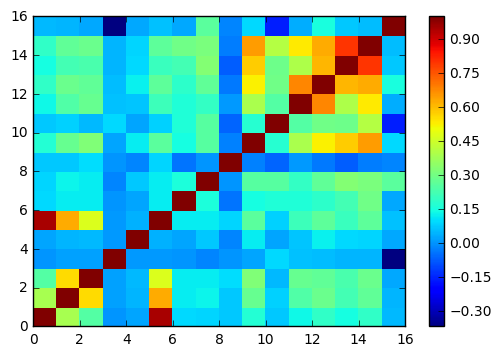

In [14]:
from pylab import pcolor, show, colorbar
corr_mat= movie.corr(method='pearson')
pcolor(corr_mat)
colorbar()
show()
plt.figure(figsize=(20,10))

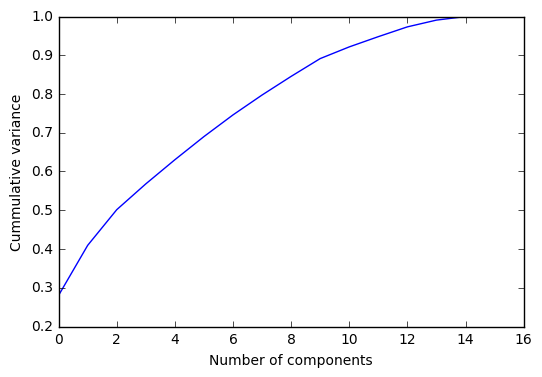

In [12]:
#normalize data
X_train = movie.values
X_train = np.asarray(X_train)
stdX= StandardScaler().fit_transform(X_train)
pca = PCA().fit(stdX)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance')
plt.show()

In [51]:
# setting up train and test set
num_of_samples = len(ratings)
np.random.seed(0)
rand_indices = np.random.permutation(num_of_samples)
num_training_samples = int(num_of_samples*0.75)
trainX= X_train[rand_indices[:num_training_samples]]
trainY = ratings[rand_indices[:num_training_samples]]
testX= X_train[rand_indices[num_training_samples:]]
testY= ratings[rand_indices[num_training_samples:]]
trainY = list(trainY)

In [57]:
from sklearn import neighbors
num_neighbours= 5
knn = neighbors.KNeighborsRegressor(num_neighbours,weights='uniform')
knn.fit(trainX,trainY)
y1_knn= knn.predict(trainX)
y1_knn = list(y1_knn)

error =0
for i in range(len(trainY)):
    error +=(abs(y1_knn[i]-trainY[i])/trainY[i])
train_error_knn= error/len(trainY)*100
print ("Train error = "+'{}'.format(train_error_knn))+"%"



Train error = 12.4922609516%
